In [1]:
import estimators

import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Brüser

- berücksichtigt nur die Intervallschätzungen, deren qSQI > 0.4 ist
- informativ falls Coverage auf Segment >= 85% und HR Threshold eingehalten

                 precision    recall  f1-score   support

non-informative       0.56      0.99      0.71    411600
    informative       0.98      0.27      0.42    445543

       accuracy                           0.62    857143
      macro avg       0.77      0.63      0.57    857143
   weighted avg       0.78      0.62      0.56    857143

Relativer Fehler auf als informativ klassifizierten Segmenten: 1.77 Prozent
Absoluter Fehler auf als informativ klassifizierten Segmenten: 1.02 bpm
Informative Segmente nach Brueser: 14.17
Informative Segmente nach Annotation: 51.98


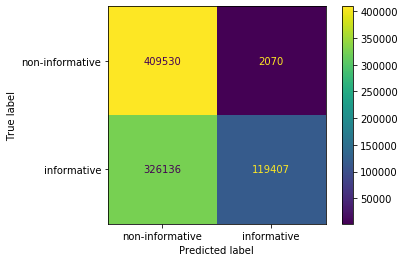

In [2]:
brueser = estimators.BrueserSingleSQI()
predicted = brueser.predict_all_labels()
labels = brueser.target
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(labels, predicted), display_labels=class_names).plot()
print(classification_report(labels, predicted, target_names=class_names))
print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % brueser.get_mean_error_rel(brueser.target.index, predicted))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % brueser.get_mean_error_abs(brueser.target.index, predicted))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)


# Pino

- Schwellwerte

### 10 Sekunden, 1 Sekunde Schrittweite

                 precision    recall  f1-score   support

non-informative       0.45      0.03      0.05    411600
    informative       0.52      0.97      0.68    445543

       accuracy                           0.52    857143
      macro avg       0.48      0.50      0.36    857143
   weighted avg       0.48      0.52      0.38    857143

Relativer Fehler auf als informativ klassifizierten Segmenten: 18.67 Prozent
Absoluter Fehler auf als informativ klassifizierten Segmenten: 13.40 bpm
Informative Segmente nach Pino: 96.98
Informative Segmente nach Annotation: 51.98


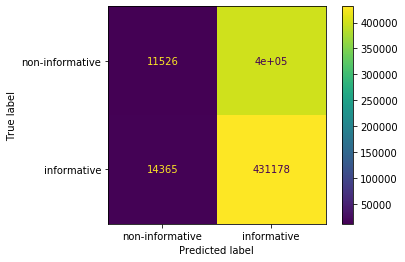

In [3]:
pino = estimators.PinoMinMaxStd()
predicted = pino.predict_all_labels()
labels = pino.target
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(labels, predicted), display_labels=class_names).plot()
print(classification_report(labels, predicted, target_names=class_names))
print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % pino.get_mean_error_rel(brueser.target.index, predicted))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % pino.get_mean_error_abs(brueser.target.index, predicted))
print("Informative Segmente nach Pino: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### 4 Sekunden, 1 Sekunde Schrittweite

                 precision    recall  f1-score   support

non-informative       0.55      0.02      0.03    461504
    informative       0.46      0.99      0.63    395670

       accuracy                           0.46    857174
      macro avg       0.51      0.50      0.33    857174
   weighted avg       0.51      0.46      0.31    857174

Relativer Fehler auf als informativ klassifizierten Segmenten: 22.73 Prozent


/Users/zianor/Documents/git/Bachelorarbeit/Implementation/src/estimators.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_subset = data_subset[labels]
/Users/zianor/Documents/git/Bachelorarbeit/Implementation/src/estimators.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_subset = data_subset[labels]


Absoluter Fehler auf als informativ klassifizierten Segmenten: 17.13 bpm
Informative Segmente nach Pino: 98.54
Informative Segmente nach Annotation: 46.16


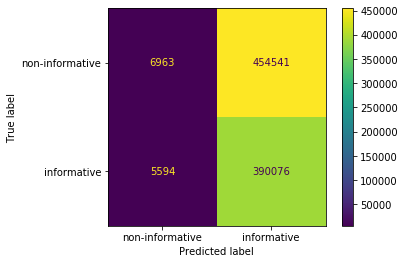

In [4]:
pino = estimators.PinoMinMaxStd(segment_length=4, overlap_amount=0.75)
predicted = pino.predict_all_labels()
labels = pino.target
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(labels, predicted), display_labels=class_names).plot()
print(classification_report(labels, predicted, target_names=class_names))
print("Relativer Fehler auf als informativ klassifizierten Segmenten: %.2f Prozent" % pino.get_mean_error_rel(brueser.target.index, predicted))
print("Absoluter Fehler auf als informativ klassifizierten Segmenten: %.2f bpm" % pino.get_mean_error_abs(brueser.target.index, predicted))
print("Informative Segmente nach Pino: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)